# Aufgabe 2: Classification

Das Ziel von Ensemble-Methoden besteht darin, die Vorhersagen mehrerer Basisschätzer zu kombinieren, die mit einem gegebenen Lernalgorithmus gebaut wurden, um die Verallgemeinerbarkeit / Robustheit über einen einzigen Schätzer zu verbessern.

Da Ensembles eine Kombination mehrerer kleinerer Klassifikatoren sind, sind sie ein gutes Beispiel für einen Job, der auf Multicore-Architekturen, wie SDIL, massiv beschleunigt werden kann, da jeder Klassifikator parallel trainiert wird.

a) Simulieren Sie einen ausreichenden Anzahl an dummy Daten (>100.000 Datenpunkten) mit der Methode `sklearn.datasets.make_classification`.

In [1]:
import matplotlib.pyplot as plt
import multiprocessing
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

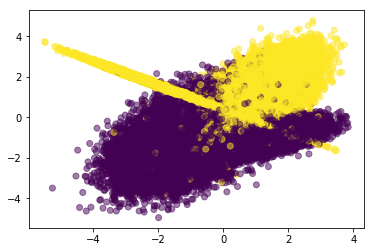

In [2]:
X, y = make_classification(n_samples=200000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2, random_state=1337)

plt.scatter(X[:,0],X[:,1],c=y, alpha=0.5);

b) Trainieren Sie einen Ensemble-Classifier (z.B. Random Forest) auf dummy Daten auf eine unterschiedliche Anzahl von CPU-Kerne (parameter `n_jobs` in sklearn).

In [16]:
times = []
clf = None
n_jobs_list = range(1, multiprocessing.cpu_count()+1)
for n_jobs in n_jobs_list:
    t0 = time()
    clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, n_jobs=n_jobs)
    clf.fit(X,y)
    times.append(time() - t0)
clf.score(X, y)

0.924955

c) Plotten Sie anschließend eine Kurve mit der Trainingszeit, in Abhängigkeit der Anzahl an CPU-Kernen.

[11.526428461074829,
 6.300581455230713,
 4.599900007247925,
 3.8133466243743896,
 3.464993715286255,
 3.1719982624053955,
 2.981656551361084,
 3.100965976715088]

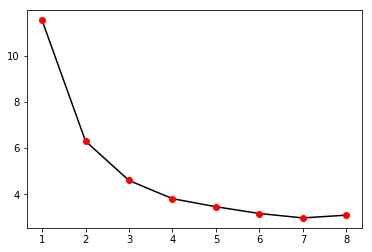

In [15]:
plt.plot(n_jobs_list, times, 'k', n_jobs_list, times, 'ro')
times